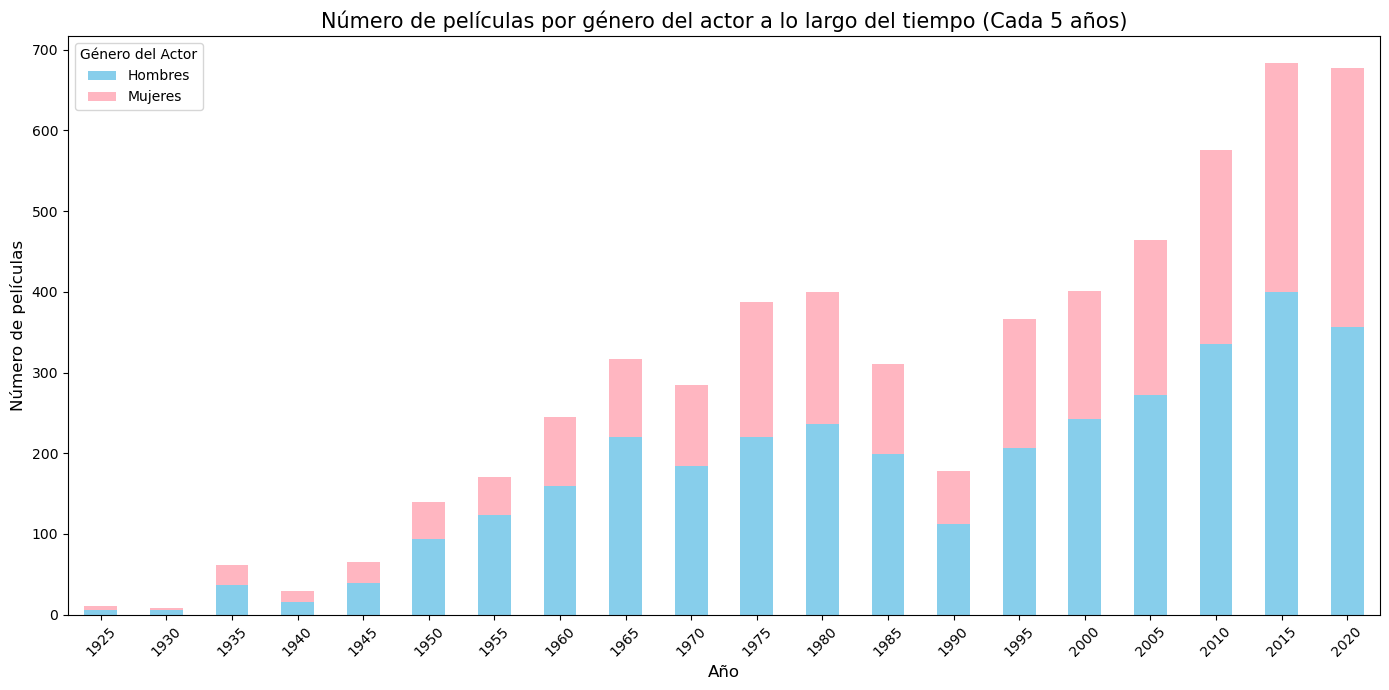

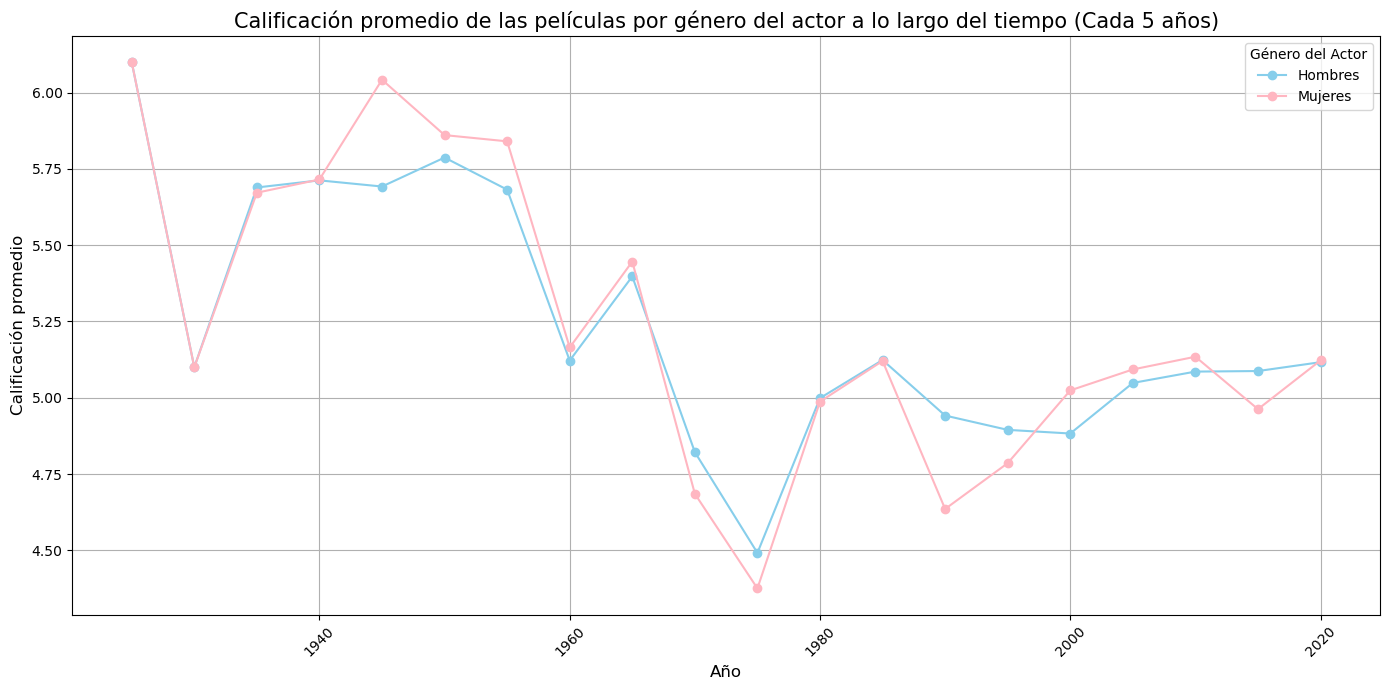

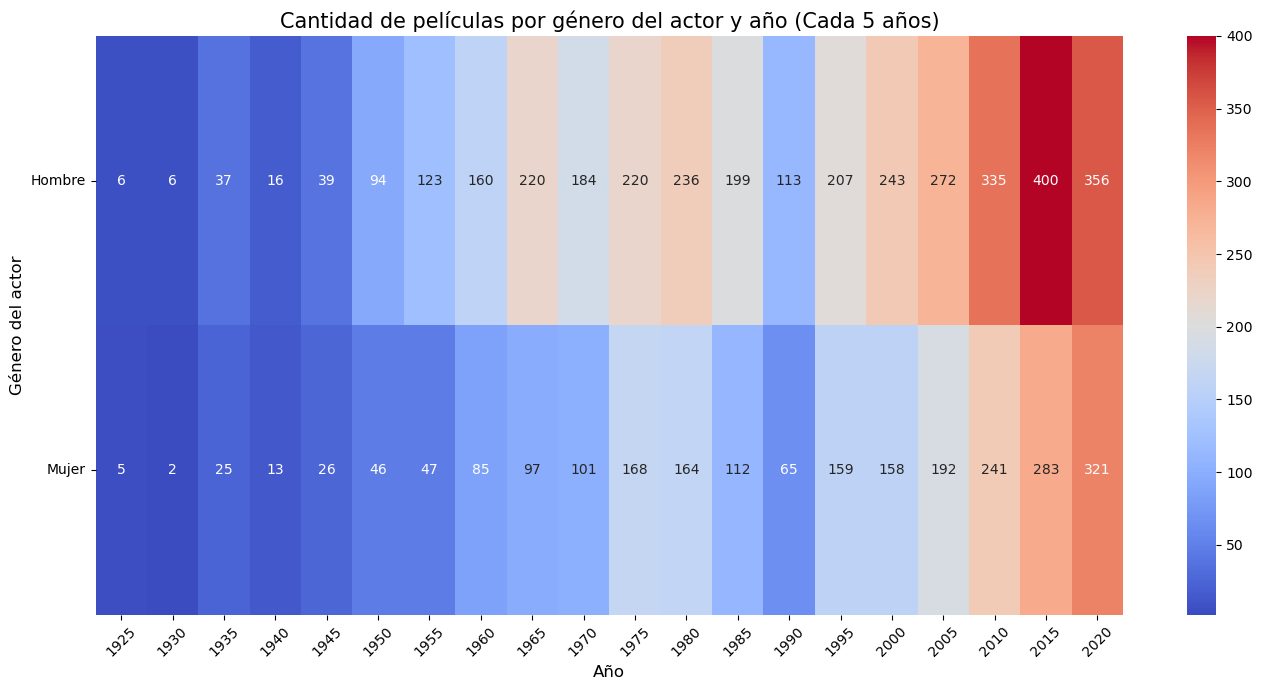

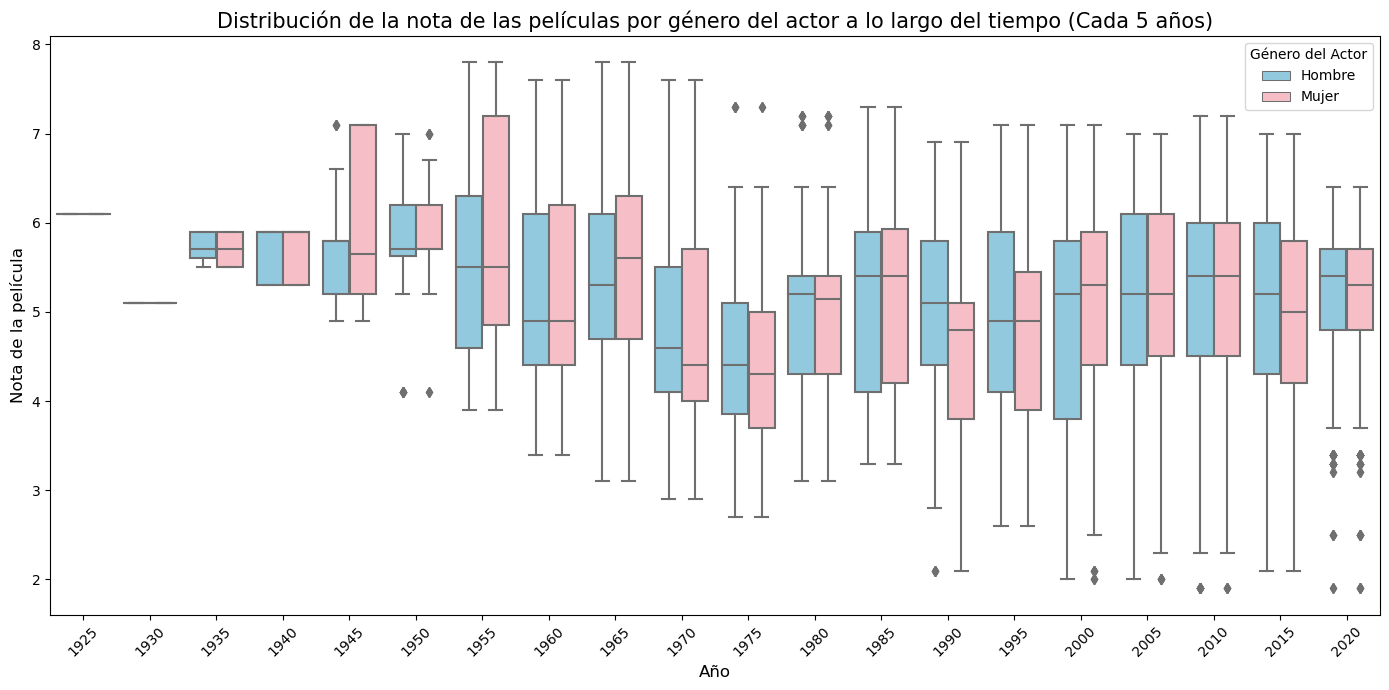

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import numpy as np

# Cargamos los datos de los dos archivos CSV
df_actores = pd.read_csv('data/data_actores_filmaffinity.csv')
df_peliculas_original = pd.read_csv('data/data_peliculas_transformado_filtrado.csv')

# Convertir la columna "Peliculas" de strings que representan listas a listas reales de Python
df_actores['Peliculas'] = df_actores['Peliculas'].apply(ast.literal_eval)

# Expandir el DataFrame de actores para que haya una fila por cada actor-película
df_actores_expanded = df_actores.explode('Peliculas')

# Extraer el año de las fechas en formato string y convertir a entero
df_peliculas = df_peliculas_original.copy()
df_peliculas['Año'] = pd.to_datetime(df_peliculas['Año'], errors='coerce').dt.year.astype('Int64')
df_peliculas = df_peliculas[df_peliculas['Año'].notnull() & (df_peliculas['Año'] != 0)]

# Renombrar la columna "Título" en df_peliculas para poder hacer un merge con "Peliculas" en df_actores_expanded
df_peliculas_renamed = df_peliculas.rename(columns={'Título': 'Peliculas'})

# Unir (merge) los dataframes en las películas para tener la información combinada
df_combined = df_actores_expanded.merge(df_peliculas_renamed, on='Peliculas', how='inner')

# Asegurarse de que el rango de años sea correcto, convirtiendo a enteros
start_year = int(df_combined['Año'].min())
end_year = int(df_combined['Año'].max())
years = range(start_year, end_year + 1, 5)  # Cada 5 años

# Preparar los datos para los gráficos
df_time_genre = df_combined.copy()
movies_by_year_gender = df_time_genre.groupby(['Año', 'Sexo'])['Peliculas'].count().unstack().fillna(0)
movies_by_year_gender_filtered = movies_by_year_gender.loc[years]
df_avg_rating_time_genre = df_time_genre.groupby(['Año', 'Sexo'])['Nota'].mean().reset_index()
df_avg_rating_time_genre_filtered = df_avg_rating_time_genre[df_avg_rating_time_genre['Año'].isin(years)].sort_values('Año')
df_boxplot_data = df_time_genre[['Año', 'Sexo', 'Nota']]
df_boxplot_data_filtered = df_boxplot_data[df_boxplot_data['Año'].isin(years)]

# Definir la paleta de colores
color_palette = ['skyblue', 'lightpink']

# Gráfico de barras apiladas por género y año
movies_by_year_gender_filtered.plot(kind='bar', stacked=True, figsize=(14, 7), color=color_palette)
plt.title('Número de películas por género del actor a lo largo del tiempo (Cada 5 años)', fontsize=15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de películas', fontsize=12)
plt.legend(title='Género del Actor', labels=['Hombres', 'Mujeres'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de líneas para calificación promedio por género y año
plt.figure(figsize=(14, 7))

# Separar los datos por género para poder trazarlos
df_hombres = df_avg_rating_time_genre_filtered[df_avg_rating_time_genre_filtered['Sexo'] == 'Hombre']
df_mujeres = df_avg_rating_time_genre_filtered[df_avg_rating_time_genre_filtered['Sexo'] == 'Mujer']

# Trazar las líneas para cada género
# Notar que utilizamos 'Hombre' y 'Mujer' para ser consistentes con los datos mostrados anteriormente
plt.plot(df_hombres['Año'], df_hombres['Nota'], marker='o', color=color_palette[0], label='Hombres')
plt.plot(df_mujeres['Año'], df_mujeres['Nota'], marker='o', color=color_palette[1], label='Mujeres')

# Añadir título y etiquetas
plt.title('Calificación promedio de las películas por género del actor a lo largo del tiempo (Cada 5 años)', fontsize=15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Calificación promedio', fontsize=12)

# Añadir leyenda
plt.legend(title='Género del Actor')

# Añadir cuadrícula, rotación de las etiquetas del eje x y ajustar el diseño
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Mapa de calor por género y año
plt.figure(figsize=(14, 7))
sns.heatmap(movies_by_year_gender_filtered.T, cmap='coolwarm', annot=True, fmt='.0f')
plt.title('Cantidad de películas por género del actor y año (Cada 5 años)', fontsize=15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Género del actor', fontsize=12)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de cajas para distribución de notas por género y año
plt.figure(figsize=(14, 7))
sns.boxplot(x='Año', y='Nota', hue='Sexo', data=df_boxplot_data_filtered, palette=color_palette)
plt.title('Distribución de la nota de las películas por género del actor a lo largo del tiempo (Cada 5 años)', fontsize=15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Nota de la película', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Género del Actor')
plt.tight_layout()
plt.show()


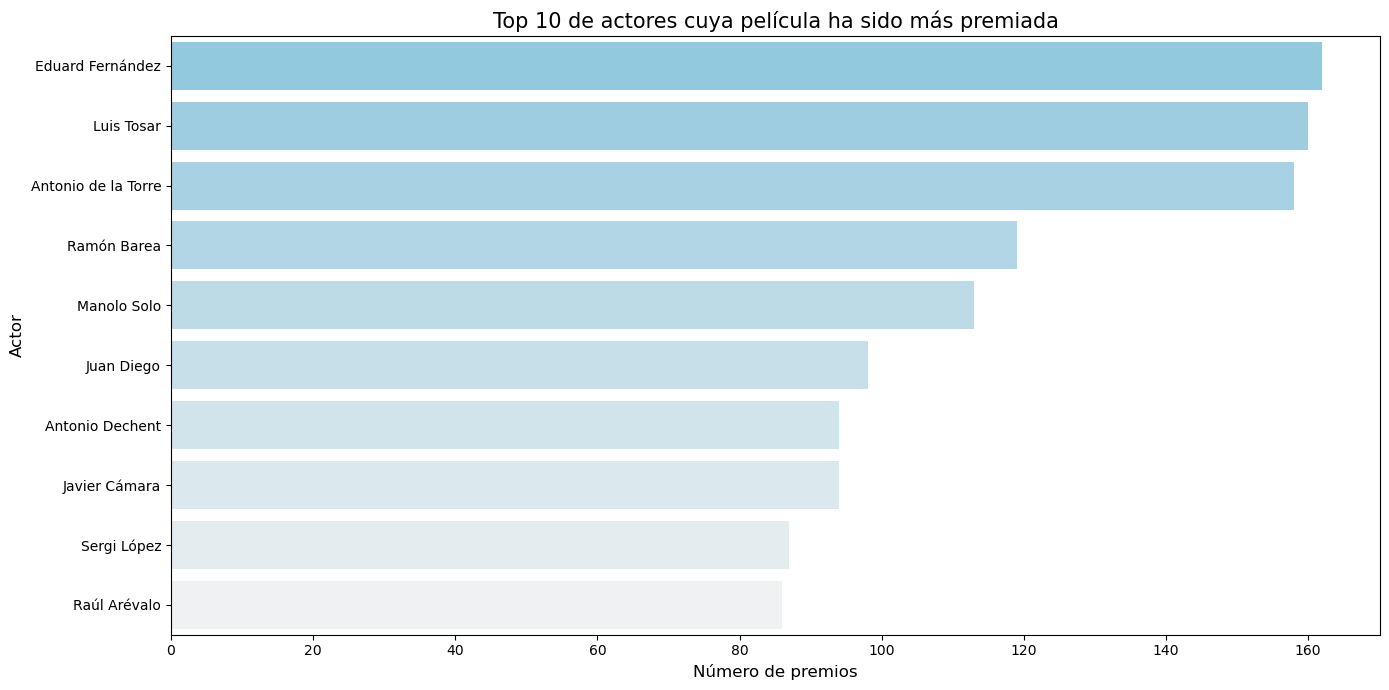

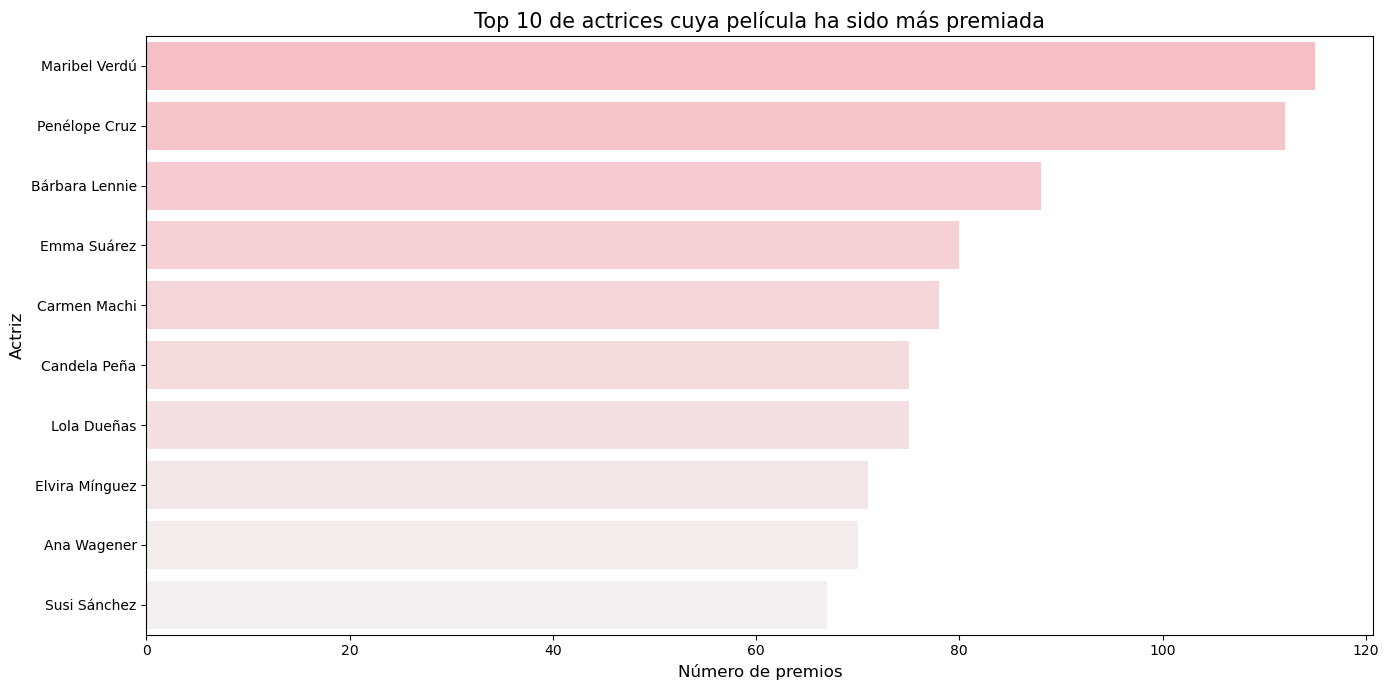

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Cargar los datos desde los archivos CSV
df_actores = pd.read_csv('data/data_actores_filmaffinity.csv')
df_peliculas_original = pd.read_csv('data/data_peliculas_transformado_filtrado.csv')

# Convertir la columna "Peliculas" de strings que representan listas a listas reales de Python
df_actores['Peliculas'] = df_actores['Peliculas'].apply(ast.literal_eval)

# Crear una fila por cada actor-película
df_actores_expanded = df_actores.explode('Peliculas')

# Extraer el año y convertirlo a número entero
df_peliculas = df_peliculas_original.copy()
df_peliculas['Año'] = pd.to_datetime(df_peliculas['Año'], errors='coerce').dt.year.astype('Int64')
df_peliculas = df_peliculas[df_peliculas['Año'].notnull() & (df_peliculas['Año'] != 0)]

# Convertir los premios a listas y contarlos
df_peliculas_original['Premios'] = df_peliculas_original['Premios'].fillna('[]').apply(ast.literal_eval)
df_peliculas_original['Numero_Premios'] = df_peliculas_original['Premios'].apply(len)

# Combinar los dataframes en base a las películas
df_combinado = df_actores_expanded.merge(df_peliculas_original[['Título', 'Numero_Premios']], 
                                         left_on='Peliculas', 
                                         right_on='Título', 
                                         how='left')

# Sumar los premios por cada actor y agrupar por género
df_premios_por_actor = df_combinado.groupby(['Actor', 'Sexo'])['Numero_Premios'].sum().reset_index()

# Separar y ordenar los actores y actrices por el número de premios
df_premios_actores = df_premios_por_actor[df_premios_por_actor['Sexo'] == 'Hombre'].sort_values(by='Numero_Premios', ascending=False)
df_premios_actrices = df_premios_por_actor[df_premios_por_actor['Sexo'] == 'Mujer'].sort_values(by='Numero_Premios', ascending=False)

# Seleccionar los 10 actores y actrices con más premios
top_actores_premios = df_premios_actores.head(10)
top_actrices_premios = df_premios_actrices.head(10)

# Crear paletas de colores con efecto degradado para cada género
paleta_azul = sns.light_palette("skyblue", n_colors=10, reverse=True)
paleta_rosa = sns.light_palette("lightpink", n_colors=10, reverse=True)

# Generar el gráfico para actores con la paleta de azul
plt.figure(figsize=(14, 7))
sns.barplot(x='Numero_Premios', y='Actor', data=top_actores_premios, palette=paleta_azul)
plt.title('Top 10 de actores cuya película ha sido más premiada', fontsize=15)
plt.xlabel('Número de premios', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.tight_layout()
plt.show()

# Generar el gráfico para actrices con la paleta de rosa
plt.figure(figsize=(14, 7))
sns.barplot(x='Numero_Premios', y='Actor', data=top_actrices_premios, palette=paleta_rosa)
plt.title('Top 10 de actrices cuya película ha sido más premiada', fontsize=15)
plt.xlabel('Número de premios', fontsize=12)
plt.ylabel('Actriz', fontsize=12)
plt.tight_layout()
plt.show()
